In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import seaborn as sns

# Constants

In [3]:
PATH_DATA = Path.cwd().parent.parent.parent / 'data'
PATH_DATA.exists()

True

In [4]:
PATH_SCRAPED = PATH_DATA / "raw" / "scraped"
PATH_SCRAPED.exists()

True

In [5]:
PATH_PREPROCESSED_HM = (PATH_DATA / "preprocessed" / "human_microbiome")
PATH_PREPROCESSED_HM.exists()

True

In [6]:
PATH_TAXONOMY_HM = (PATH_SCRAPED / "human_microbiome" / "taxonomy")
PATH_TAXONOMY_HM.exists()

True

## Data Extraction

In [7]:
df_hm_name_formatting = pd.read_csv(PATH_PREPROCESSED_HM / 'human_microbiome_name_formatting.csv', dtype=str)
df_hm_name_formatting = df_hm_name_formatting.replace({',': '.'}, regex=True)
df_hm_name_formatting = df_hm_name_formatting.apply(pd.to_numeric, errors='ignore')
df_hm_name_formatting

C:\Users\Diego\AppData\Local\Temp\ipykernel_29720\72806326.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_hm_name_formatting = df_hm_name_formatting.apply(pd.to_numeric, errors='ignore')


,name,formatted_name_ncbi,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916
1,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-19.0,-60.097422,3.004871,0.992778,1.615916
2,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-18.0,-56.932342,2.996439,0.992802,1.615916
3,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-17.0,-53.767871,2.987104,0.992832,1.615916
4,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-16.0,-50.604134,2.976714,0.992870,1.615916
...,...,...,...,...,...,...,...,...,...,...,...
37592,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,16.0,24.995198,1.666347,0.999600,1.447162
37593,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,17.0,26.579909,1.661244,0.999560,1.447162
37594,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,18.0,28.163527,1.656678,0.999523,1.447162
37595,_Bacteroides__pectinophilus_ATCC_43243_uid27825,_Bacteroides__pectinophilus_ATCC_43243,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,19.0,29.746347,1.652575,0.999488,1.447162


## Data Preparation

In [8]:
df_composite_key_hm = df_hm_name_formatting.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_hm.shape

(917, 11)

## DeltaDq vs GC

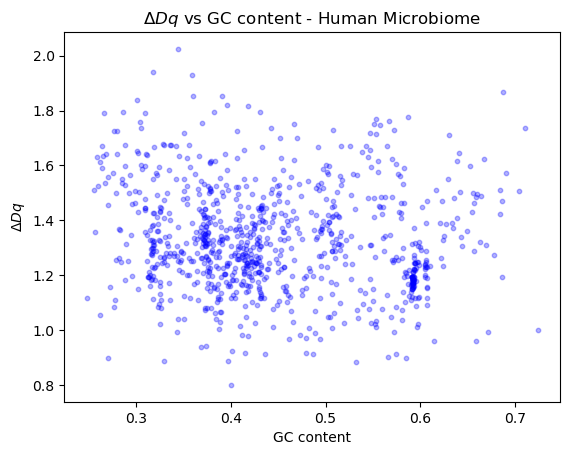

In [9]:
plt.scatter(
    x=df_composite_key_hm['GC_content'],
    y=df_composite_key_hm['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

## Taxonomy

### Data prep

In [10]:
df_tax_hm = pd.read_json(PATH_TAXONOMY_HM / 'taxonomy_hm.json', dtype=str)
df_tax_hm = df_tax_hm.rename(columns={'organism_name': 'formatted_name_ncbi'})
df_tax_hm.head()

,url,formatted_name_ncbi,no rank,superkingdom,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies
0,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Achromobacter_piechaudii_ATCC_43553,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,nan,nan,nan
1,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acinetobacter_baumannii_6013150,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan
2,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Achromobacter_xylosoxidans_C54,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,nan,nan,nan
3,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acinetobacter_calcoaceticus_RUH2202,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter calcoaceticus,Acinetobacter calcoaceticus/baumannii complex,nan,nan
4,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acinetobacter_baumannii_ATCC_19606___CIP_70_34,cellular organisms,Bacteria,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan


In [11]:
df_combined_hm = pd.merge(df_composite_key_hm, df_tax_hm, on='formatted_name_ncbi', how='left')
df_combined_hm


,name,formatted_name_ncbi,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,...,kingdom,phylum,class,order,family,genus,species,species group,clade,subspecies
0,Achromobacter_piechaudii_ATCC_43553_uid46343,Achromobacter_piechaudii_ATCC_43553,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,...,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter piechaudii,nan,nan,nan
1,Achromobacter_xylosoxidans_C54_uid38739,Achromobacter_xylosoxidans_C54,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GL636060,741255,0.655275,-20.0,-60.465531,2.879311,0.981706,...,Pseudomonadati,Pseudomonadota,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter xylosoxidans,nan,nan,nan
2,Acidaminococcus_D21_uid34117,Acidaminococcus_D21,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_ACGB01000001,138060,0.488853,-20.0,-55.118059,2.624669,0.986374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acinetobacter_ATCC_27244_uid30949,Acinetobacter_ATCC_27244,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG665949,481320,0.378322,-20.0,-60.156267,2.864584,0.985111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acinetobacter_baumannii_6013113_uid33017,Acinetobacter_baumannii_6013113,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GL891580,349645,0.396056,-20.0,-58.450265,2.783346,0.984739,...,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter baumannii,Acinetobacter calcoaceticus/baumannii complex,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Veillonella_parvula_ATCC_17745_uid41557,Veillonella_parvula_ATCC_17745,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_ADFU01000017,582154,0.378300,-20.0,-58.838529,2.801835,0.996607,...,Bacillati,Bacillota,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella parvula,nan,nan,nan
913,Veillonella_ratti_ACS_216_V_Col6b_uid52119,Veillonella_ratti_ACS_216_V_Col6b,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_JH992936,1053529,0.417542,-20.0,-58.825181,2.801199,0.995044,...,Bacillati,Bacillota,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella seminalis,nan,nan,nan
914,Weissella_paramesenteroides_ATCC_33313_uid34661,Weissella_paramesenteroides_ATCC_33313,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG697129,615831,0.380854,-20.0,-60.906469,2.900308,0.983706,...,Bacillati,Bacillota,Bacilli,Lactobacillales,Lactobacillaceae,Weissella,Weissella paramesenteroides,nan,nan,nan
915,Yokenella_regensburgei_ATCC_43003_uid65133,Yokenella_regensburgei_ATCC_43003,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_JH417874,2596006,0.546398,-20.0,-68.685970,3.270760,0.990531,...,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Yokenella,Yokenella regensburgei,nan,nan,nan


In [12]:
df_combined_hm.columns

Index(['name', 'formatted_name_ncbi', 'url_x', 'sequence', 'seq_length',
       'GC_content', 'Q', 'Tau(Q)', 'D(Q)', 'r_squared', 'Delta_Dq', 'url_y',
       'no rank', 'superkingdom', 'kingdom', 'phylum', 'class', 'order',
       'family', 'genus', 'species', 'species group', 'clade', 'subspecies'],
      dtype='object')

In [13]:
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'species group', 'clade', 'subspecies']
df_combined_hm[taxonomy_columns] = df_combined_hm[taxonomy_columns].apply(lambda col: col.mask(col.isna(), pd.NA))
df_combined_hm[taxonomy_columns] = df_combined_hm[taxonomy_columns].replace('nan', pd.NA)
df_combined_hm['superkingdom'].unique()

array(['Bacteria', <NA>, 'Archaea'], dtype=object)

### Set

In [14]:
# Define the columns of interest
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'species group', 'clade', 'subspecies']

# Calculate unique counts for each column
unique_counts = {column: df_combined_hm[column].nunique() for column in taxonomy_columns}

# Convert the dictionary to a DataFrame for better readability
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Count'])

# Display the DataFrame
unique_counts


{'superkingdom': 2,
 'kingdom': 3,
 'phylum': 10,
 'class': 19,
 'order': 37,
 'family': 74,
 'genus': 163,
 'species': 377,
 'species group': 7,
 'clade': 2,
 'subspecies': 1}

In [1]:
# Define the taxonomic rank
taxonomic_rank = 'clade'

# Define the number of top categories you want to plot
N = 5  

In [15]:
# Calculate the frequency counts
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Get the top N categories
top_categories = frequency_counts.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_hm[df_combined_hm[taxonomic_rank].isin(top_categories)]
print(len(frequency_counts))
frequency_counts[:15]

2


clade
FCB group            95
Methanomada group     2
Name: count, dtype: int64

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_29720\254875834.py:35: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} (top {N}) - Human Microbiome')


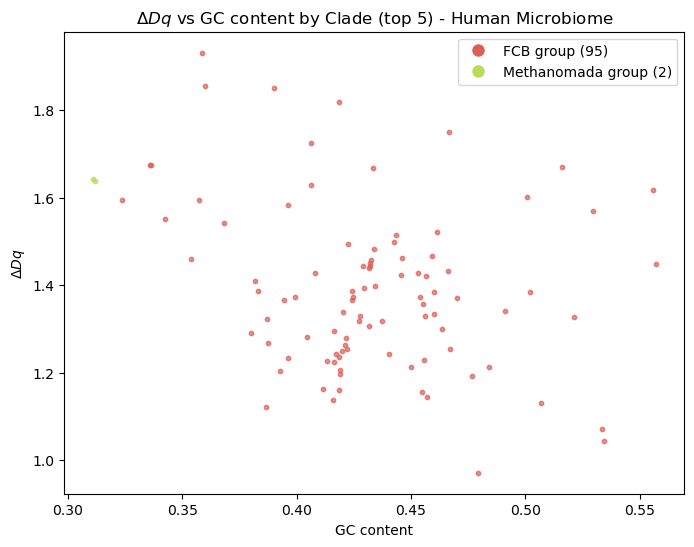

In [16]:
colors = sns.color_palette('hls', N)

plt.figure(figsize=(8, 6))

legend_handles = []

# Loop over each unique category and plot separately
for i, (category, group) in enumerate(df_filtered.groupby(taxonomic_rank)):
    num_points = len(group)

    if not category:
        continue

    plt.scatter(    
        x=group['GC_content'],
        y=group['Delta_Dq'],
        s=10,
        color=colors[i],  # Assign a unique color from the color palette
        alpha=0.7,
        label=category
    )

    # Create a custom legend handle with full opacity
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'{category} ({num_points})',
        markerfacecolor=colors[i],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} (top {N}) - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

# Show legend with custom handles
plt.legend(handles=legend_handles)#, title=taxonomic_rank.capitalize())

# Display plot
plt.show()

In [17]:
# taxonomic_rank = 'kingdom'

# Calculate the frequency counts
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Define the number of top categories you want to plot individually
# N = 8  # You can change this number to suit your needs

# Get the top N categories
top_categories = frequency_counts.index[:N]

# Total number of data points (excluding NaNs)
total_points = df_combined_hm[taxonomic_rank].notna().sum()
print(frequency_counts.shape)
frequency_counts[:15]


(2,)


clade
FCB group            95
Methanomada group     2
Name: count, dtype: int64

<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_29720\537863897.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Human Microbiome')


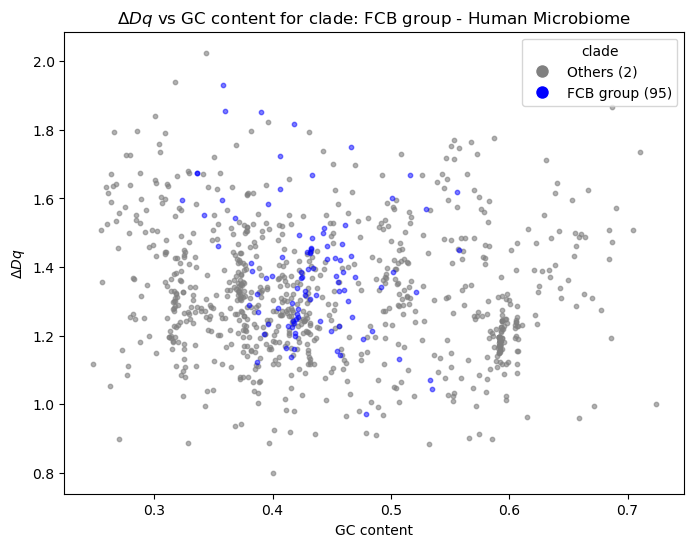

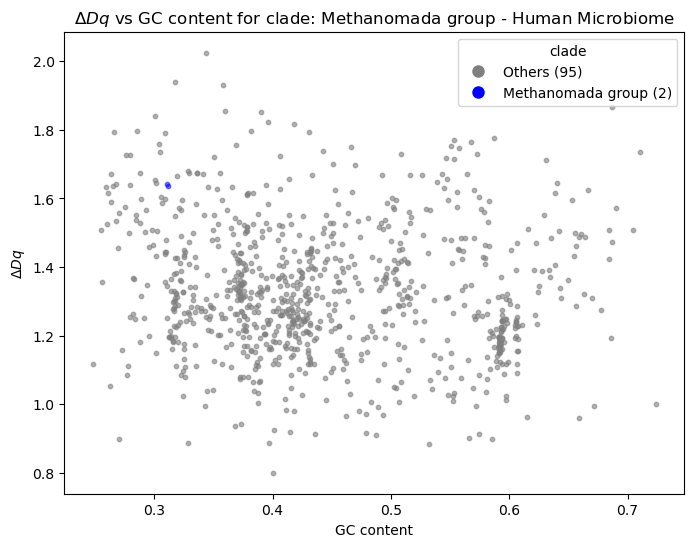

In [18]:
# Assuming 'N' and 'top_categories' have been defined earlier in your code
# Generate a list of high-contrast colors
colors = sns.color_palette('Set3', N)

# Define the neutral background color
background_color = 'gray'

# Iterate over each of the top categories to create individual plots
for i, category in enumerate(top_categories):
    plt.figure(figsize=(8, 6))
    
    # Filter data for the current category
    category_data = df_combined_hm[df_combined_hm[taxonomic_rank] == category]
    num_points = len(category_data)
    
    # Plot all data points in the background color (excluding the current category)
    background_data = df_combined_hm[df_combined_hm[taxonomic_rank] != category]
    plt.scatter(
        x=background_data['GC_content'],
        y=background_data['Delta_Dq'],
        s=10,
        color=background_color,
        alpha=0.6,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Highlight the current category with a distinct color
    plt.scatter(
        x=category_data['GC_content'],
        y=category_data['Delta_Dq'],
        s=10,
        color='blue',  # Use 'colors[i]' if you want different colors per category
        alpha=0.5,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Create custom legend handles with alpha=1 (fully opaque)
    legend_handles = [
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'Others ({total_points - num_points})',
            markerfacecolor=background_color,
            markersize=10,
            alpha=1  # Ensure full opacity
        ),
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'{category} ({num_points})',
            markerfacecolor='blue',  # Or colors[i] if using the color palette
            markersize=10,
            alpha=1  # Ensure full opacity
        )
    ]
    
    # Add plot title and labels
    plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Human Microbiome')
    plt.xlabel('GC content')
    plt.ylabel(r'$\Delta Dq$')
    
    # Show legend with custom handles
    plt.legend(handles=legend_handles, title=taxonomic_rank)
    
    # Optionally, save the plot to a file
    # plt.savefig(f'plot_{category}.png')
    
    # Display plot
    plt.show()


## Stacked Histograms

In [192]:
df_combined_hm.shape


(917, 24)

In [193]:
# taxonomic_rank = 'genus'
# N = 8
frequency_counts = df_combined_hm[taxonomic_rank].value_counts()

# Get the top N categories based on frequency
top_categories = frequency_counts.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_hm[df_combined_hm[taxonomic_rank].isin(top_categories)]
print(len(frequency_counts))
frequency_counts[:12]


19


class
Bacilli                  212
Actinomycetes            127
Bacteroidia               82
Clostridia                80
Gammaproteobacteria       71
Betaproteobacteria        30
Negativicutes             21
Tissierellia              16
Erysipelotrichia          15
Spirochaetia              15
Epsilonproteobacteria     11
Flavobacteriia            11
Name: count, dtype: int64

In [194]:
# Define the number of bins for GC content
num_bins = 20  # Adjust this number as needed

# Create bins for GC content using numpy's linspace function
gc_content_bins = np.linspace(
    0,
    1,
    num_bins + 1
)

# Bin the 'GC_content' data and assign bin labels
df_filtered['GC_content_bin'] = pd.cut(
    df_filtered['GC_content'],
    bins=gc_content_bins,
    include_lowest=True
)

# Remove any rows with NaN values in 'taxonomic_rank' or 'GC_content_bin'
df_filtered = df_filtered.dropna(subset=[taxonomic_rank, 'GC_content_bin'])

# Create a crosstab of counts per GC content bin and taxonomic rank
crosstab = pd.crosstab(
    df_filtered['GC_content_bin'],  # Rows: GC content bins
    df_filtered[taxonomic_rank]     # Columns: Taxonomic categories
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_14704\1020088050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GC_content_bin'] = pd.cut(


<Figure size 1000x750 with 0 Axes>

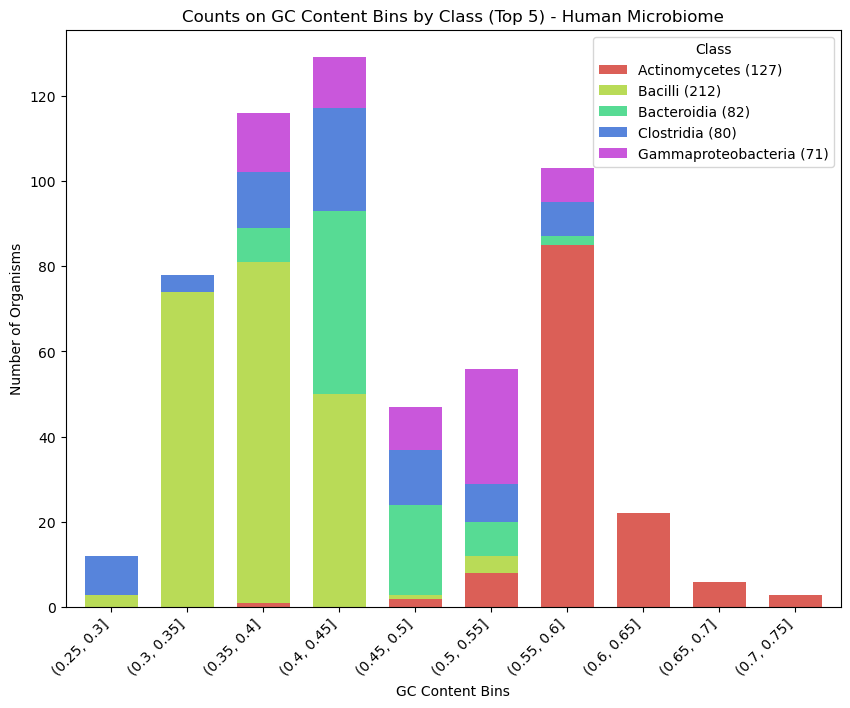

In [195]:
taxon_counts = df_filtered[taxonomic_rank].value_counts()
legend_labels = {
    taxon: f"{taxon} ({count})" for taxon, count in taxon_counts.items()
}

# Generate a color palette with N distinct colors
colors = sns.color_palette('hls', N)

# Set the figure size
plt.figure(figsize=(10, 7.5))

# Plot the stacked bar chart
ax = crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7.5),
    color=colors,  # Use the custom color palette
    width=0.7  # Set the bar width to 1.0 to make bars touch
)

# Update the legend with formatted labels
handles, labels = ax.get_legend_handles_labels()
formatted_labels = [legend_labels[label] for label in labels]
ax.legend(handles, formatted_labels, title=f'{taxonomic_rank.capitalize()}')

# Customize the plot
plt.title(f'Counts on GC Content Bins by {taxonomic_rank.capitalize()} (Top {N}) - Human Microbiome')
plt.xlabel('GC Content Bins')
plt.ylabel('Number of Organisms')
plt.xticks(rotation=45, ha='right')

# Add a legend with a title and the number of points
# plt.legend(title=f'{taxonomic_rank.capitalize()}')# ({ len(df_filtered)})') })')

# Adjust layout to prevent clipping of tick-labels
# plt.tight_layout()

plt.show()